In [16]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h1>Overview</h1>

In [17]:
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

In [18]:
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [19]:
# Eliminate null RespondentID
star_wars = star_wars[pd.notnull(star_wars["RespondentID"])]

<h1>Cleaning and Mapping Yes/No Columns</h1>

In [20]:
# Mapping for yes/no values
yes_no = {"Yes": True, "No": False}
print(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts())
print(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts())
star_wars["Have you seen any of the 6 films in the Star Wars franchise?"] = star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].map(yes_no)
star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"] = star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].map(yes_no)

print(star_wars["Have you seen any of the 6 films in the Star Wars franchise?"].value_counts())
print(star_wars["Do you consider yourself to be a fan of the Star Wars film franchise?"].value_counts())

Yes    936
No     250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
Yes    552
No     284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64
True     936
False    250
Name: Have you seen any of the 6 films in the Star Wars franchise?, dtype: int64
True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64


<h1>Cleaning and Mapping Checkbox Columns</h1>

In [21]:
# Renaming the columns and mapping the values of the corresponding columns to Boolean values
option_columns = star_wars.columns[3:9]
print(option_columns)

Index(['Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8'],
      dtype='object')


In [22]:
option_maps = {
  'Star Wars: Episode I  The Phantom Menace': True,
  'Star Wars: Episode II  Attack of the Clones': True,
  'Star Wars: Episode III  Revenge of the Sith': True,
  'Star Wars: Episode IV  A New Hope': True,
  'Star Wars: Episode V The Empire Strikes Back': True,
  'Star Wars: Episode VI Return of the Jedi': True,
  True: True,
  False: False,
  np.nan: False
}

star_wars[option_columns] = star_wars[option_columns].apply(lambda t: t.map(option_maps))
star_wars[option_columns].head(10)

,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True
6,True,True,True,True,True,True
7,True,True,True,True,True,True
8,True,True,True,True,True,True
9,True,True,True,True,True,True
10,False,True,False,False,False,False


In [23]:
column_rename = {
  'Which of the following Star Wars films have you seen? Please select all that apply.': 'seen1',
  'Unnamed: 4': 'seen2',
  'Unnamed: 5': 'seen3',
  'Unnamed: 6': 'seen4',
  'Unnamed: 7': 'seen5',
  'Unnamed: 8': 'seen6'
}
star_wars.rename(columns=column_rename, inplace=True)
star_wars[star_wars.columns[3:9]].head()

,seen1,seen2,seen3,seen4,seen5,seen6
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


<h1>Cleaning the Ranking Columns</h1>

In [24]:
# Convert the reponse type to float

star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# Rename the response columns

col_map = {
    "Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": 'ranking_1',
    "Unnamed: 10":'ranking_2',
    "Unnamed: 11":'ranking_3',
    "Unnamed: 12":'ranking_4',
    "Unnamed: 13":'ranking_5',
    "Unnamed: 14":'ranking_6'
}

star_wars.rename(columns=col_map, inplace=True)
star_wars[star_wars.columns[9:15]].head(10)

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
1,3.0,2.0,1.0,4.0,5.0,6.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,2.0,3.0,4.0,5.0,6.0
4,5.0,6.0,1.0,2.0,4.0,3.0
5,5.0,4.0,6.0,2.0,1.0,3.0
6,1.0,4.0,3.0,6.0,5.0,2.0
7,6.0,5.0,4.0,3.0,1.0,2.0
8,4.0,5.0,6.0,3.0,2.0,1.0
9,5.0,4.0,6.0,2.0,1.0,3.0
10,1.0,2.0,3.0,4.0,5.0,6.0


<h1>Finding the Highest-Ranked Movie</h1>

In [25]:
# Computing mean of each ranking column

star_wars[star_wars.columns[9:15]].mean()

ranking_1    3.732934
ranking_2    4.087321
ranking_3    4.341317
ranking_4    3.272727
ranking_5    2.513158
ranking_6    3.047847
dtype: float64

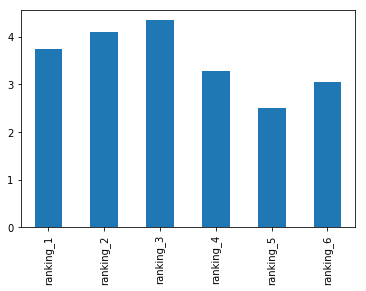

In [26]:
# Bar plot for each ranking

star_wars[star_wars.columns[9:15]].mean().plot.bar()

From the bar graph, the ranking of the Star Wars based on the respondents is as follows:

<ol>
    <li>Star Wars: Episode V The Empire Strikes Back
    <li>Star Wars: Episode VI Return of the Jedi
    <li>Star Wars: Episode IV  A New Hope
    <li>Star Wars: Episode I  The Phantom Menace
    <li>Star Wars: Episode II  Attack of the Clones
    <li>Star Wars: Episode III  Revenge of the Sith
</ol>

<h1>Finding the Most Viewed Movie</h1>

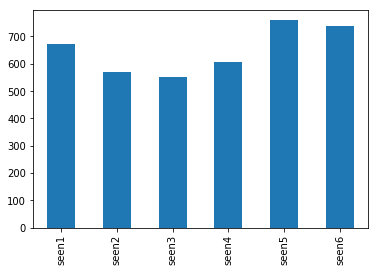

In [27]:
# Compute the total number of respondents seen each of the Star wars film in the franchise

star_wars[star_wars.columns[3:9]].sum()

# Plotting bar chart for it

star_wars[star_wars.columns[3:9]].sum().plot.bar()

Based on the bar charts, we can infer the following,

<ul>
    <li> Star Wars 5 exceeds the number of viewerships as well as the highly ranked movie in the franchise
    <li> Star Wars 3 has the least amount of viewership as well as lowest ranked movie in the franchise
</ul>

<h1>Exploring the Data by Binary Segments</h1>

In [30]:
# Exploring data based on gender category
males = star_wars[star_wars["Gender"] == "Male"]
females = star_wars[star_wars["Gender"] == "Female"]
sex_rank = pd.DataFrame({'males': males[males.columns[9:15]].mean(), 'females': females[females.columns[9:15]].mean()})
sex_seen = pd.DataFrame({'males': males[males.columns[3:9]].mean(), 'females': females[females.columns[3:9]].mean()})
print(sex_rank)
print(sex_seen)

              males   females
ranking_1  4.037825  3.429293
ranking_2  4.224586  3.954660
ranking_3  4.274882  4.418136
ranking_4  2.997636  3.544081
ranking_5  2.458629  2.569270
ranking_6  3.002364  3.078086
          males   females
seen1  0.726358  0.542805
seen2  0.649899  0.431694
seen3  0.637827  0.404372
seen4  0.688129  0.464481
seen5  0.788732  0.642987
seen6  0.778672  0.615665


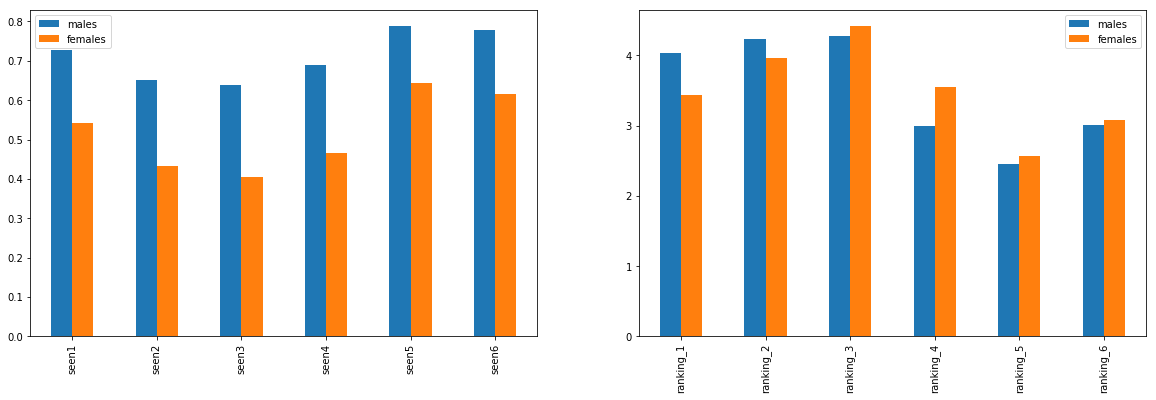

In [31]:
# Plot bar graphs to compare

fig = plt.figure(figsize=(20, 6))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sex_seen.plot(kind='bar', ax=ax1)
sex_rank.plot(kind='bar', ax=ax2)

Based on the bar graph, it can be seen that males prefer to watch star wars than females. 